# Donation Game More Memory

**Imports**

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

In [3]:
import numpy as np

In [4]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
import glob

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
matplotlib.rc('font', **font)

In [8]:
cmaps = [matplotlib.cm.get_cmap("Blues"), matplotlib.cm.get_cmap("Reds"), matplotlib.cm.get_cmap("Greens"), 
         matplotlib.cm.get_cmap("Purples"), matplotlib.cm.get_cmap("Oranges")]

### Heatmaps for SI

**Two interactions and Two opponents**

In [10]:
two_opponents_files = [f"../to_archieve/clean_two_opponents_benefit_{b}.csv" for b in [3, 10]]

two_op_dfs = [pd.read_csv(file) for file in two_opponents_files]

In [11]:
heatmaps = []
extents = []

    
for df in two_op_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

In [12]:
min_, max_ = (1.0, 1391629.0)

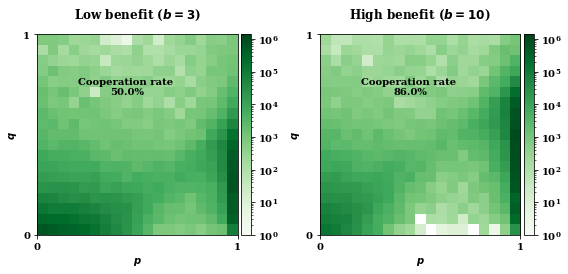

In [13]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_op_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[2],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")

    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')



axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);

axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

fig.savefig("../static/two_interactions_donation_game.pdf", bbox_inches='tight')

In [17]:
two_rounds_files = [f"../to_archieve/clean_two_rounds_benefit_{b}.csv" for b in [3, 10]]

two_rounds_dfs = [pd.read_csv(file) for file in two_rounds_files]

In [18]:
heatmaps = []
extents = []

    
for df in two_rounds_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

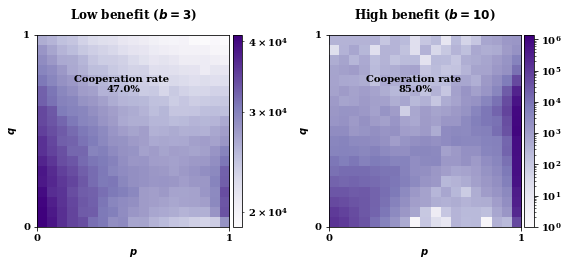

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_rounds_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)
    
    if i == 1:
        im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                                cmap=cmaps[3],
                                norm=colors.LogNorm(vmin=min_, vmax=max_))
    else:
        im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                                cmap=cmaps[3],
                                norm=colors.LogNorm())       

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')


axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);
axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

fig.savefig("../static/two_rounds_donation_game.pdf", bbox_inches='tight')

### Combining two rounds opponents data sets

In [20]:
two_rounds_opponents_files = [f"../to_archieve/clean_two_rounds_opponents_benefit_{b}.csv" for b in [3, 10]]

two_rounds_opponents_dfs = [pd.read_csv(file) for file in two_rounds_opponents_files]

In [21]:
heatmaps = []
extents = []

    
for df in two_rounds_opponents_dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p"], df["q"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)


    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    heatmaps.append(heatmap)
    extents.append(extent)

In [22]:
min_, max_ = (1.0, 1391629.0)

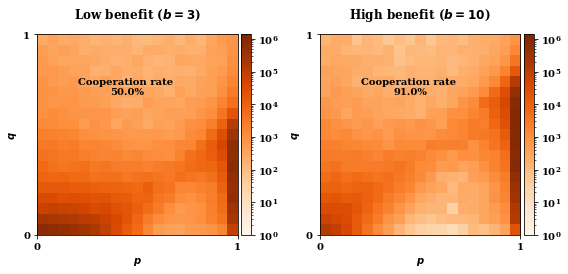

In [23]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(8, 7))

cooperation_rates = [round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 2) 
                     for df in two_rounds_opponents_dfs]

for i, heatmap in enumerate([heatmaps[0], heatmaps[1]]):
    
    index = (i % 2)

    im = axes[index].imshow(heatmap.T, extent=extent, origin="lower",
                            cmap=cmaps[4],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))
    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));
    axes[index].set_xlabel("$p$")
    axes[index].set_ylabel("$q$")
    
    axes[index].text(0.45, 0.7, "Cooperation rate \n" + str(cooperation_rates[i] * 100) + '%',
                     horizontalalignment='center')


axes[0].set_title(r"Low benefit ($b=3$)", weight="bold", y=1.05);
axes[1].set_title(r"High benefit ($b=10$)", weight="bold", y=1.05);


fig.tight_layout();

fig.savefig("../static/two_rounds_opponents_donation_game.pdf", bbox_inches='tight')

### Cooperation Rates Bar plots

In [26]:
titles = ["Perfect Memory Payoffs",
          "Limited Memory Payoffs" "\n" "(last round with one other player)",
          "Limited Memory Payoffs" "\n" "(last round with two other players)",
          "Limited Memory Payoffs" "\n" "(last two rounds with one other player)",
          "Limited Memory Payoffs" "\n" "(last two rounds with two other players)"]

In [30]:
low_benefit_files = [
         "../to_archieve/perfect_memory/clean_c_1_b_3_stochastic_0.csv",
         "../to_archieve/limited_memory/clean_last_round_b_3.csv",
         "../to_archieve/clean_two_opponents_benefit_3.csv",
         "../to_archieve/clean_two_rounds_benefit_3.csv",
         "../to_archieve/clean_two_rounds_opponents_benefit_3.csv"]

In [31]:
hig_benefit_files = [
         "../to_archieve/perfect_memory/clean_c_1_b_10_stochastic_0.csv",
         "../to_archieve/limited_memory/clean_last_round_b_10.csv",
         "../to_archieve/clean_two_opponents_benefit_10.csv",
         "../to_archieve/clean_two_rounds_benefit_10.csv",
         "../to_archieve/clean_two_rounds_opponents_benefit_10.csv"]

In [32]:
low_dfs = [pd.read_csv(file) for file in low_benefit_files]

In [33]:
bar_colors = [cmap(0.9) for cmap in cmaps]

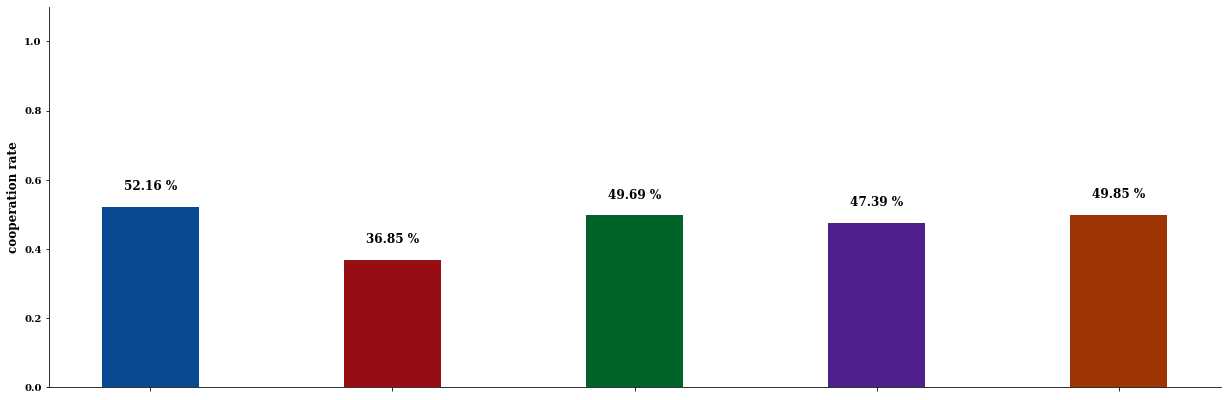

In [34]:
fig, axes = plt.subplots(figsize=(21, 7));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) for df in low_dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
# axes.set_xticklabels([titles[0], titles[1], titles[2], titles[3], titles[4]], fontsize=10);
axes.set_xticklabels(["" for _ in range(5)], fontsize=10);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )


for ax in [axes.spines["right"], axes.spines["top"]]:
    ax.set_visible(False);
    
plt.savefig("../paper/static/cooperation_rates_for_low_benefit.pdf", bbox_inches='tight')

In [35]:
high_dfs = [pd.read_csv(file) for file in hig_benefit_files]

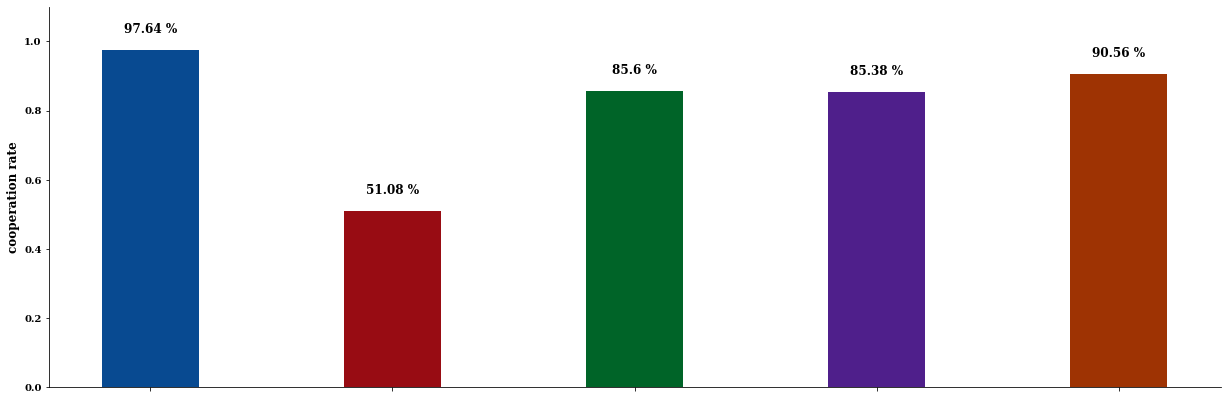

In [36]:
fig, axes = plt.subplots(figsize=(21, 7));

height = [sum(df['average cooperation rate'] * (df['frequencies'] / sum(df['frequencies']))) 
          for df in high_dfs]

x_pos = np.arange(len(titles))

axes.bar(x_pos, height, width=0.4, color=bar_colors);

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1.1);
axes.set_xticks([0, 1, 2, 3, 4]);
axes.set_xticklabels(["" for _ in range(5)], fontsize=10);

for j, pos in enumerate([0, 1, 2, 3, 4]):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j] * 100, 2)} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )

    
    
for ax in [axes.spines["right"], axes.spines["top"]]:
    ax.set_visible(False);

    
plt.savefig("../paper/static/cooperation_rates_for_high_benefit.pdf", bbox_inches='tight')